# Formulação Teorica

Considere a seguinte tarefa:

Seja X um vetor de variaveis preditoras $X=[x_1,x_2,...,x_m]$ e $Y=[y_i]$ um outro conjunto de variaveis alvo. Consideremos inicialmente $Y$ de tamanho 1.

Nossa tarefa então será ajustar uma função $F$ tal que $Y=F(X)$

Porem qual função melhor representaria esta função $F$?


Considere por exemplo a função a seguir:
![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Absolute_value.svg/200px-Absolute_value.svg.png)

Uma forma de representar esta e conhecida como função por partes. Como vemos a seguir:
$$y=-x ,x<=0$$
$$y=x, x>0$$


Outra função seria a seguinte:
    ![](PorPartes.png)

## Redes neurais: a matematica

Dado que podemos representar outras funções por funções por partes. Podemos pensar nessa função $F(X)$ como uma função por partes $G(H(X))$

Inicialmente considere um modelo simples de função por partes onde H é uma função linear e G não linear. Mostrado na figura a seguir

![](https://miro.medium.com/max/2000/1*7pwA1DjBw6JDkwZQecUNiw.png)

Nesta figura consideramos que $Y$ seria a aplicação de uma função não linear e a função G seria expressa por $\sum_{i=1}^{m} w_ix_i$

Uma função mais complexa poderia ser obtida onde existem diversos $y_i$ na segunda camada. Estes se conectando a um terceiro $y$. Para ajustar essa função teriamos um problema de otimização para encontrar o conjunto de parametros $w$ que minimizassem uma função de erro

## Revendo calculo: Gradiente

Um metodo conhecido de otimização é chamado gradiente descendente. Este se baseia em utilizar o vetor gradiente da função para indicar como os parametros devem ser modificados. Primeiramente uma pequena revisão do que é o vetor gradiente.

o vetor gradiente, denotado por $\nabla$ é obtido atraves das derivadas parciais de uma função n-dimensional. 

Por exemplo o vetor gradiente de uma dada função $F(i,j)$ é dado pela expressão $\nabla F(i,j) =(\frac{\partial F }{\partial i}, \frac{\partial F}{\partial j} )$


Por exemplo considere a função: $$F(i,j) = i^2 + 2ij +3j^2$$

Teremos:

$$\frac{\partial F }{\partial i}= \frac{\partial i^2 }{\partial i} + \frac{\partial 2ij }{\partial i} +\frac{\partial 3j^2 }{\partial i} $$

Esta expressão é equivalente a:

$$\frac{\partial F }{\partial i}= \frac{d i^2 }{d i} + \frac{j d2i }{di} +\frac{j^2 d1 }{di}= 2i + 2j $$


Em seguida tomando a derivada parcial em relação a j teremos

$$\frac{\partial F }{\partial j}= 2i+6j$$

Assim o vetor gradiente $\nabla F =(2i+2j,2i+6j)$

assim vemos que ao modificar o parametro i mexemos igualmente na influencia da função tanto em i quanto em j, em contrapartida ao atuarmos em j geramos uma maior influencia sobre $j$. Assim obtendo o gradiente, o metodo do gradiente descendente é um metodo interativo de optimização dado pela seguinte expressão:

$$w_{t+1}=w_t - \alpha \frac{\partial F}{\partial w}$$

onde $\alpha$ é o passo de integração e $w$ é um dos parametros da função $F$

O processo de otimização dado pelo gradiente descendente e visto na animação abaixo


![](https://miro.medium.com/max/700/1*OG1d4edy5BFYeQ0yHjBOJA.gif)


Nesta animação temos uma função $y=wx+b$ sendo ajustada, considerando como função de erro o erro medio quadrado dado por $Erro=(Y-wx-b)^2$

# Parte pratica, um exemplo em regressão

Considere a função $y=wx+b$

Queremos ajustar então a curva para um conjunto de dados

De acordo com o metodo do gradiente descendente primeiro definimos uma função de erro, vamos utilizar o mse dado pela expressão:

$$mse= \frac{1}{N}\sum_{i=1}^{N} (Y_i-y_i)^2  $$

Onde Y e o valor alvo e y o valor predito

In [1]:
import numpy as np
X=np.array(range(10))
Y=3+X*2

$$\frac{\partial MSE}{\partial w}=  -2(Y-wx-b)x   $$


$$\frac{\partial MSE}{\partial b}=  2(Y-wx-b)   $$

Dado a formula do gradiente descendente implementamos este a seguir

In [2]:
W=5
b=10
epochs=1000
Lr=1e-3
Angular=[]
Linear=[]
for i in range(epochs):
    DMSE_DW= np.sum(2*(-Y+W*X+b)*X)
    DMSE_DB=np.sum(2*(-Y+W*X+b))
    W=W-Lr*DMSE_DW
    b=b-Lr*DMSE_DB
    Angular.append(W)
    Linear.append(b)

In [3]:
import matplotlib.pyplot as plt

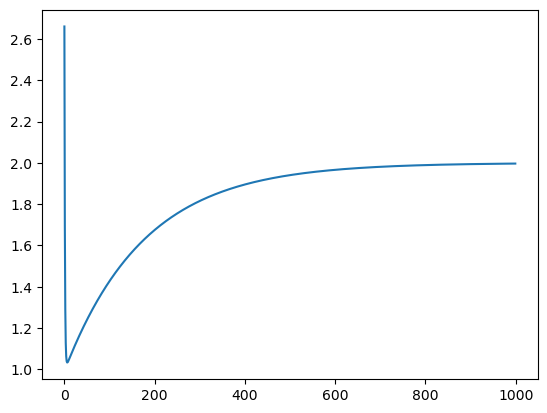

In [4]:
plt.plot(Angular)
plt.show()

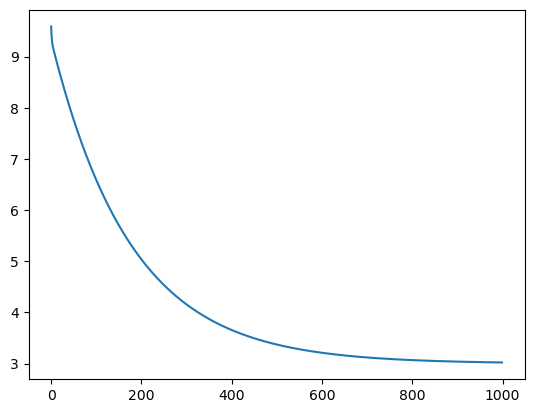

In [5]:
plt.plot(Linear)
plt.show()

# Tarefa Gradiente Descendente

Repita o processo acima para otimizar os coeficientes de uma função quadratica do tipo ax^2 +bx +c

Em especifico considere a função $3x^2 -5x + 10$ com coeficientes iniciais a=5,b= -1,c=4 

# Inicio da parte pratica: Redes

De forma generalizada ao considerar multiplas camadas nos utilizariamos da regra da cadeia para calcular estas derivadas parciais.


A seguir mostraremos como implementamos o processo de otimização dentro do framework keras. Primeiramente devemos obter nosso conjunto de dados, utilizaremos o pandas para isto

In [6]:
import pandas as pd
path='iris.csv'
#path='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
Dados=pd.read_csv(path)

In [7]:
Dados.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Consideramos o seguinte problema de regressão inicialmente, Obter valor de Sepal.Length em função de Sepal.Width e Petal.Length, extraimos os dados então em X e Y

In [8]:
X=Dados[['Sepal.Width', 'Petal.Length']].values
X[1:10]

array([[3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5]])

In [9]:
Y=Dados['Sepal.Width'].values

In [10]:
Y[1:10]

array([3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1])

In [11]:
X.shape

(150, 2)

In [12]:
Y.shape

(150,)

Importando as dependencias do ambiente keras

In [13]:
from keras.layers import Dense
from keras.models import Sequential

O framework keras possui duas interfaces para construção de modelos, a interface sequencial é uma interface mais simples mas que da apenas suporte a construção de modelos sequenciais. estes são modelos em que o grafo é direcionado e é do tipo uma entrada uma saida.

Uma alternativa para modelos mais complexos é o modelo funcional. Este permite a construção de redes com diferentes niveis hierarquicos e n entradas e m saidas.

Inicialmente estaremos utilizando um modelo funcional.

In [14]:
Modelo=Sequential()
Modelo.add(Dense(1,input_shape=(2,),activation='linear') )

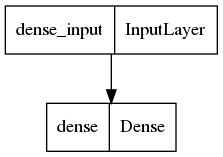

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(Modelo)

In [16]:
Modelo.compile(loss='mse',optimizer='adam')

In [17]:
H=Modelo.fit(X,Y,epochs=1000)

Epoch 1/1000
5/5 [==============================] - 0s 2ms/step - loss: 17.0687
Epoch 2/1000
5/5 [==============================] - 0s 1ms/step - loss: 16.8040
Epoch 3/1000
5/5 [==============================] - 0s 970us/step - loss: 16.5354
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 16.2765
Epoch 5/1000
5/5 [==============================] - 0s 1ms/step - loss: 16.0248
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 15.7717
Epoch 7/1000
5/5 [==============================] - 0s 1ms/step - loss: 15.5226
Epoch 8/1000
5/5 [==============================] - 0s 1ms/step - loss: 15.2782
Epoch 9/1000
5/5 [==============================] - 0s 1ms/step - loss: 15.0414
Epoch 10/1000
5/5 [==============================] - 0s 1ms/step - loss: 14.8063
Epoch 11/1000
5/5 [==============================] - 0s 1ms/step - loss: 14.5758
Epoch 12/1000
5/5 [==============================] - 0s 1ms/step - loss: 14.3499
Epoch 13/1000
5/5 [================

5/5 [==============================] - 0s 2ms/step - loss: 5.7060
Epoch 103/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.6800
Epoch 104/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.6530
Epoch 105/1000
5/5 [==============================] - 0s 990us/step - loss: 5.6299
Epoch 106/1000
5/5 [==============================] - 0s 889us/step - loss: 5.6038
Epoch 107/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.5757
Epoch 108/1000
5/5 [==============================] - 0s 2ms/step - loss: 5.5538
Epoch 109/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.5295
Epoch 110/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.5055
Epoch 111/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.4821
Epoch 112/1000
5/5 [==============================] - 0s 942us/step - loss: 5.4578
Epoch 113/1000
5/5 [==============================] - 0s 1ms/step - loss: 5.4376
Epoch 114/1000
5/5 [=================

5/5 [==============================] - 0s 2ms/step - loss: 3.9308
Epoch 203/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.9155
Epoch 204/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.9004
Epoch 205/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.8852
Epoch 206/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.8692
Epoch 207/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.8542
Epoch 208/1000
5/5 [==============================] - 0s 886us/step - loss: 3.8390
Epoch 209/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.8236
Epoch 210/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.8081
Epoch 211/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.7933
Epoch 212/1000
5/5 [==============================] - 0s 1ms/step - loss: 3.7775
Epoch 213/1000
5/5 [==============================] - 0s 2ms/step - loss: 3.7619
Epoch 214/1000
5/5 [=====================

5/5 [==============================] - 0s 974us/step - loss: 2.5028
Epoch 303/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4903
Epoch 304/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4774
Epoch 305/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4644
Epoch 306/1000
5/5 [==============================] - 0s 960us/step - loss: 2.4513
Epoch 307/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4387
Epoch 308/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.4262
Epoch 309/1000
5/5 [==============================] - 0s 2ms/step - loss: 2.4136
Epoch 310/1000
5/5 [==============================] - 0s 918us/step - loss: 2.4012
Epoch 311/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.3884
Epoch 312/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.3759
Epoch 313/1000
5/5 [==============================] - 0s 1ms/step - loss: 2.3635
Epoch 314/1000
5/5 [=================

5/5 [==============================] - 0s 1ms/step - loss: 1.4041
Epoch 403/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3955
Epoch 404/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3864
Epoch 405/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3772
Epoch 406/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3684
Epoch 407/1000
5/5 [==============================] - 0s 952us/step - loss: 1.3600
Epoch 408/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3507
Epoch 409/1000
5/5 [==============================] - 0s 960us/step - loss: 1.3417
Epoch 410/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3331
Epoch 411/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3245
Epoch 412/1000
5/5 [==============================] - 0s 993us/step - loss: 1.3153
Epoch 413/1000
5/5 [==============================] - 0s 1ms/step - loss: 1.3067
Epoch 414/1000
5/5 [=================

5/5 [==============================] - 0s 1ms/step - loss: 0.6812
Epoch 503/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6759
Epoch 504/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6705
Epoch 505/1000
5/5 [==============================] - 0s 968us/step - loss: 0.6649
Epoch 506/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.6596
Epoch 507/1000
5/5 [==============================] - 0s 858us/step - loss: 0.6544
Epoch 508/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6490
Epoch 509/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6439
Epoch 510/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6384
Epoch 511/1000
5/5 [==============================] - 0s 953us/step - loss: 0.6336
Epoch 512/1000
5/5 [==============================] - 0s 942us/step - loss: 0.6282
Epoch 513/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.6230
Epoch 514/1000
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.2825
Epoch 603/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2798
Epoch 604/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2772
Epoch 605/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.2745
Epoch 606/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2719
Epoch 607/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2692
Epoch 608/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2666
Epoch 609/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2640
Epoch 610/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2616
Epoch 611/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2589
Epoch 612/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 613/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.2540
Epoch 614/1000
5/5 [=======================

5/5 [==============================] - 0s 1ms/step - loss: 0.1022
Epoch 704/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.1011
Epoch 705/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.1001
Epoch 706/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0991
Epoch 707/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0981
Epoch 708/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0971
Epoch 709/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0961
Epoch 710/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0951
Epoch 711/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0942
Epoch 712/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0932
Epoch 713/1000
5/5 [==============================] - 0s 991us/step - loss: 0.0923
Epoch 714/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0913
Epoch 715/1000
5/5 [=====================

5/5 [==============================] - 0s 1ms/step - loss: 0.0409
Epoch 805/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0406
Epoch 806/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0404
Epoch 807/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0401
Epoch 808/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0398
Epoch 809/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0396
Epoch 810/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 811/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 812/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0387
Epoch 813/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0385
Epoch 814/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0382
Epoch 815/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 816/1000
5/5 [=======================

5/5 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 906/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 907/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 908/1000
5/5 [==============================] - 0s 894us/step - loss: 0.0258
Epoch 909/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 910/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 911/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 912/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 913/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.0256
Epoch 914/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 915/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.0255
Epoch 916/1000
5/5 [==============================] - 0s 941us/step - loss: 0.0254
Epoch 917/1000
5/5 [===================

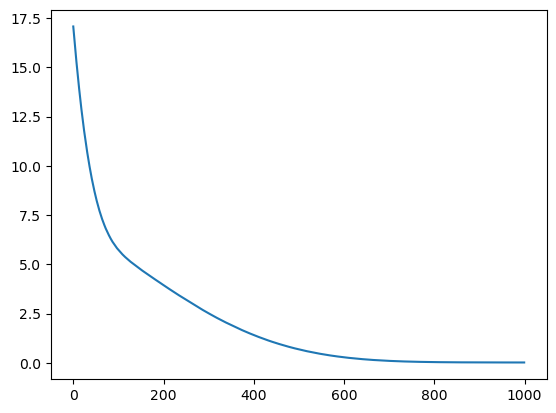

In [18]:
plt.plot(H.history['loss'])
plt.show()

E para avaliar o modelo usamos o comando evaluate

In [19]:
Modelo.evaluate(X,Y)

5/5 [==============================] - 0s 988us/step - loss: 0.0230


0.023037364706397057

E obtemos as predições com o predict

In [20]:
Preds=Modelo.predict(X)
Preds[1:5]

array([[3.1473613],
       [3.2754965],
       [3.2040215],
       [3.5169525]], dtype=float32)

Porem um ponto importante a ser discutido e que ao utilizar todo o conjunto de dados para o treinamento podemos overfitar nos dados. Para ter maior confianca que o modelo não apenas decorou os dados separamos um conjunto de teste.

# Tarefa

Separe aleatoriamente uma amostra do conjunto de dados de forma que os dados fiquem separados em treino e teste. Otimize o modelo no treino e o avalie no teste

Tambem recrie o modelo em questão utilizando mais outra variavel

# Classificação

Outro tipo de tarefa e o problema de  classificação que pode ser realizado por redes neurais. Este considera alvos categoricos ao inves de continuos.

Em problemas de classificação consideramos como função de entropia a entropia cruzada, a versão multiclasse desta é implementada pelo nome categorical_crossentropy, olhando o dataset iris temos uma coluna categorica que é a especie da planta

In [21]:
Dados['Species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

Temos alguns pontos a considerar:

* Metodos de redes são baseados em algebra linear, e otimização assim so lidam com numeros
* Buscamos uma representação destas classes de forma matematica que permita que todas estas classes sejam equidistantes

Proposta?

Base canonica:

![](https://www.geogebra.org/resource/z8d2wgtr/JPDDInG7NHk27WmN/material-z8d2wgtr.png)

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
Enconder=OneHotEncoder(sparse=False)

In [24]:
Alvo=Enconder.fit_transform(Dados['Species'].values.reshape(-1,1))

In [25]:
Alvo[1:5,]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [26]:
Modelo=Sequential()
Modelo.add(Dense(10,input_shape=(2,),activation='relu') )
Modelo.add(Dense(5,activation='relu'))
Modelo.add(Dense(3,activation='softmax'))

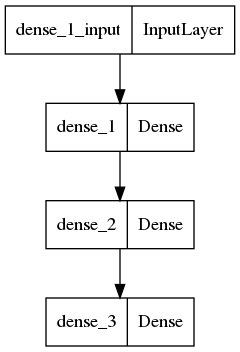

In [27]:
plot_model(Modelo)

In [28]:
Modelo.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [29]:
H=Modelo.fit(X,Alvo,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 1.4727 - accuracy: 0.3333
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 1.3963 - accuracy: 0.3333
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3452 - accuracy: 0.3333
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3047 - accuracy: 0.3333
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2694 - accuracy: 0.3333
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 1.2373 - accuracy: 0.3333
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2065 - accuracy: 0.3333
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1799 - accuracy: 0.3333
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 1.1559 - accuracy: 0.3333
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 1.1337 - accuracy: 0.3333
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.7600
Epoch 85/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5503 - accuracy: 0.7733
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.8000
Epoch 87/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.8200
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5318 - accuracy: 0.7733
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5250 - accuracy: 0.8000
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5186 - accuracy: 0.8000
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7733
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5060 - accuracy: 0.8200
Epoch 93/100
5/5 [==============================] - 0s 2ms/step - loss: 0.5002 - accuracy: 0.8200
Epoch 94/100
5/5 [===============

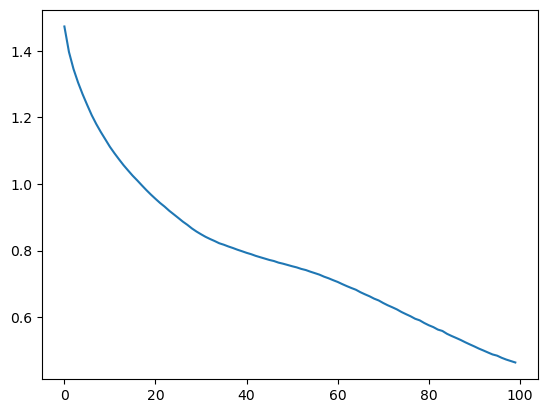

In [30]:
plt.plot(H.history['loss'])
plt.show()

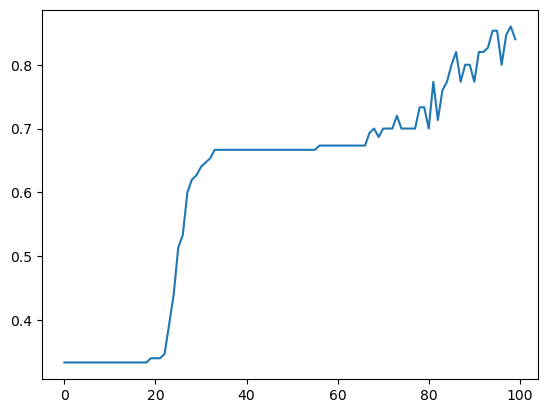

In [31]:
plt.plot(H.history['accuracy'])
plt.show()

# Tarefa classificação:

* Reproduza o processo de treino teste no problema de classificação. 
* Alem disso explore outras combinações de parametros da rede e veja como se comportam
* E interessante vizualizar a curva de treinamento e as metricas no teste para cada modelo explorado. Gere um grafico contendo essas